<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">

Classification of Weather Data <br><br>
using scikit-learn
<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Daily Weather Data Analysis</p>

In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale 

from sklearn.tree import DecisionTreeClassifier

import numpy as np
import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br></p>


In [3]:
cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'auto trans', 'gear', 'carburetor']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,auto trans,gear,carburetor
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
#features(X)= mpg(miles per gallon) and Carburetor
#Label(y)= auto trans(Automatic Transmission)

cars_data = cars.ix[:,(1,11)].values

X = scale(cars_data)
y = cars.iloc[:,9].values
#X
#y

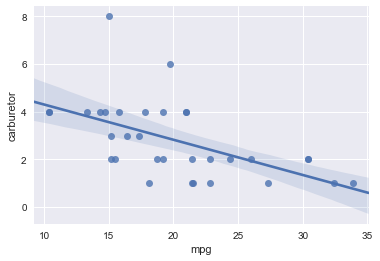

In [20]:
sb.regplot(x='mpg', y='carburetor', data=cars, scatter=True)

In [21]:
mpg = cars['mpg']
carburetor = cars['carburetor']

spearmanr_coefficient, p_value = spearmanr(mpg, carburetor)
spearmanr_coefficient, p_value

(-0.65749764305523473, 4.3375704676694645e-05)

In [22]:
cars.isnull().sum()

car_names     0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
auto trans    0
gear          0
carburetor    0
dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [56]:
#type(X_train)

#type(X_test)
#type(y_train)
#type(y_test)
#X_train
y_train

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Fit on Train Set
<br><br></p>


In [57]:
classifier = DecisionTreeClassifier(max_leaf_nodes=10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
type(classifier)

sklearn.tree.tree.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Predict on Test Set 

<br><br></p>


In [59]:
predictions = classifier.predict(X_test)

In [60]:
predictions[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [61]:
y_test[:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>


In [62]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.81818181818181823